<a href="https://colab.research.google.com/github/rkp74/Stock_Price_Prediction_using_LSTM/blob/main/Stock_Market_Prediction_And_Forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collection of Stock data from AAPL

In [60]:
import pandas_datareader as pdr

1.   Go to [Tingoo](https://www.tiingo.com/)
2.   In Left Most side,click on API.
3.   Login using google or whatever methods suits you.
4.   Click on Documentation.
5.   Go on 1.1.2 Authentication..There u will find API Token or API key



In [61]:
df = pdr.get_data_tiingo('AAPL' , api_key = "")

/usr/local/lib/python3.9/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [62]:
df.to_csv('AAPL.csv')

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('AAPL.csv')

In [65]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-12 00:00:00+00:00,174.14,175.00,173.04,173.41,22889285,41.446642,41.651329,41.184834,41.272897,91557140,0.0,1.0
1,AAPL,2018-04-13 00:00:00+00:00,174.73,175.84,173.85,174.78,25124255,41.587067,41.851255,41.377620,41.598967,100497020,0.0,1.0
2,AAPL,2018-04-16 00:00:00+00:00,175.82,176.19,174.83,175.03,21578420,41.846495,41.934558,41.610867,41.658469,86313680,0.0,1.0
3,AAPL,2018-04-17 00:00:00+00:00,178.24,178.94,176.41,176.49,26605442,42.422473,42.589079,41.986919,42.005960,106421768,0.0,1.0
4,AAPL,2018-04-18 00:00:00+00:00,177.84,178.82,176.88,177.81,20754538,42.327270,42.560518,42.098783,42.320130,83018152,0.0,1.0


In [66]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-04-03 00:00:00+00:00,166.17,166.2900,164.22,164.270,56976187,166.17,166.2900,164.22,164.270,56976187,0.0,1.0
1253,AAPL,2023-04-04 00:00:00+00:00,165.63,166.8400,165.11,166.595,46278295,165.63,166.8400,165.11,166.595,46278295,0.0,1.0
1254,AAPL,2023-04-05 00:00:00+00:00,163.76,165.0500,161.80,164.740,51511744,163.76,165.0500,161.80,164.740,51511744,0.0,1.0
1255,AAPL,2023-04-06 00:00:00+00:00,164.66,164.9584,162.00,162.430,45390123,164.66,164.9584,162.00,162.430,45390123,0.0,1.0
1256,AAPL,2023-04-10 00:00:00+00:00,162.03,162.0300,160.08,161.420,47716882,162.03,162.0300,160.08,161.420,47716882,0.0,1.0


In [67]:
df2 = df.reset_index()['close']

In [68]:
df2[1228:]

1228    147.41
1229    145.31
1230    145.91
1231    151.03
1232    153.83
1233    151.60
1234    152.87
1235    150.59
1236    148.50
1237    150.47
1238    152.59
1239    152.99
1240    155.85
1241    155.00
1242    157.40
1243    159.28
1244    157.83
1245    158.93
1246    160.25
1247    158.28
1248    157.65
1249    160.77
1250    162.36
1251    164.90
1252    166.17
1253    165.63
1254    163.76
1255    164.66
1256    162.03
Name: close, dtype: float64

In [69]:
df1 = df.reset_index()['close']

In [70]:
df1.shape

(1257,)

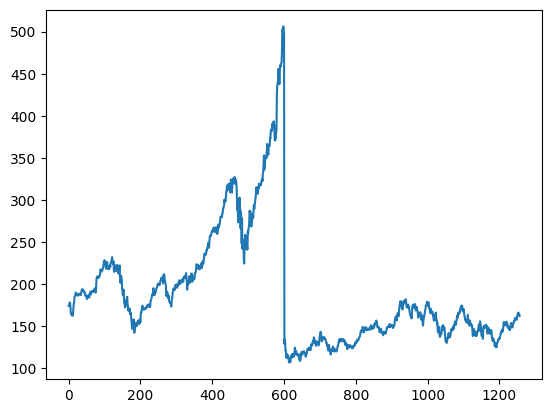

In [71]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [72]:
import numpy as np

In [73]:
## LSTM are sensitive to the scale of the data.So we generally apply MinMax scaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [74]:
df1.shape

(1257, 1)

In [113]:
print(df1)

[[0.16856606]
 [0.17004383]
 [0.17277395]
 ...
 [0.14256731]
 [0.14482154]
 [0.13823419]]


# Spilt and Preprocessing of Data

In [76]:
## Time Series Data --> Train and Test Spilt --> 
## Data = 120,130,125,140,134,150,160,190,154
## Train = 120,130,125,140,134,150
## Test = 160,190,154

train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data , test_data = df1[0:train_size,:] , df1[train_size:len(df1),:1]

In [77]:
train_size

817

In [78]:
test_size

440

In [79]:
def create_dataset(dataset,time_step=1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i: (i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)


In [80]:
time_step = 100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [81]:
print(X_train)

[[0.16856606 0.17004383 0.17277395 ... 0.29089543 0.29603006 0.30254227]
 [0.17004383 0.17277395 0.17883532 ... 0.29603006 0.30254227 0.3043707 ]
 [0.17277395 0.17883532 0.17783344 ... 0.30254227 0.3043707  0.3006387 ]
 ...
 [0.07150908 0.07085786 0.07145899 ... 0.07544145 0.07621791 0.08295554]
 [0.07085786 0.07145899 0.06599875 ... 0.07621791 0.08295554 0.08811522]
 [0.07145899 0.06599875 0.06011271 ... 0.08295554 0.08811522 0.09450219]]


In [82]:
print(X_train.shape)

(716, 100)


In [83]:
print(X_test.shape)

(339, 100)


In [84]:
print(y_train.shape)

(716,)


In [85]:
print(y_test.shape)

(339,)


In [86]:
# reshape input to be [samples,time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [87]:
X_train.shape[0]

716

In [88]:
X_train.shape[1]

100

In [114]:
X_train.shape

(716, 100, 1)

# Create Stacked LSTM Model

In [90]:
### Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [91]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape =(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' ,optimizer = 'adam')

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [93]:
from numpy.matrixlib import test
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
12/12 [==============================] - 12s 372ms/step - loss: 0.0352 - val_loss: 6.4878e-04
Epoch 2/200
12/12 [==============================] - 1s 72ms/step - loss: 0.0158 - val_loss: 0.0056
Epoch 3/200
12/12 [==============================] - 1s 56ms/step - loss: 0.0107 - val_loss: 4.1956e-04
Epoch 4/200
12/12 [==============================] - 1s 46ms/step - loss: 0.0094 - val_loss: 5.7114e-04
Epoch 5/200
12/12 [==============================] - 1s 47ms/step - loss: 0.0086 - val_loss: 4.0916e-04
Epoch 6/200
12/12 [==============================] - 1s 64ms/step - loss: 0.0071 - val_loss: 6.2076e-04
Epoch 7/200
12/12 [==============================] - 1s 43ms/step - loss: 0.0063 - val_loss: 3.3005e-04
Epoch 8/200
12/12 [==============================] - 1s 44ms/step - loss: 0.0059 - val_loss: 4.4528e-04
Epoch 9/200
12/12 [==============================] - 1s 44ms/step - loss: 0.0056 - val_loss: 6.1591e-04
Epoch 10/200
12/12 [==============================] - 0s 41ms/step

# Predict and plot Output of test data

In [94]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [95]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [96]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

225.08033022698672

In [97]:
math.sqrt(mean_squared_error(y_test,test_predict))

153.8746020473499

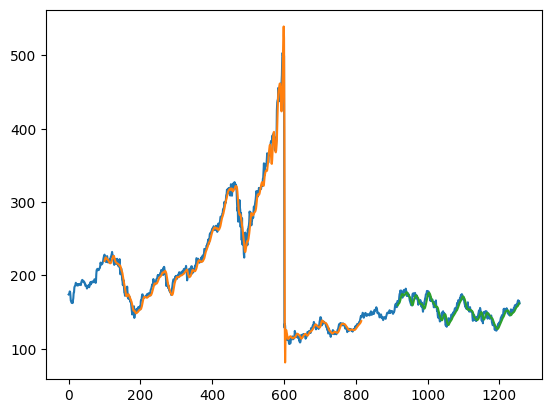

In [115]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Predict and Plot Future 30 days Stock Data

In [99]:
len(test_data)

440

In [100]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [101]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [102]:
# demonstrate prediction for next 30 days

from numpy import array

First_output = []
n_steps = 100
i=0
while(i<30):

  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = model.predict(x_input, verbose=0)
    print("{} day output".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    First_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    First_output.extend(yhat.tolist())
    i = i+1

print(First_output)    



[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[0.1403755]
[[0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.14037549495697021], [0.140375494956970

In [106]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [107]:
len(df1)

1257

In [108]:
df3 = df1.tolist()
df3.extend(First_output)

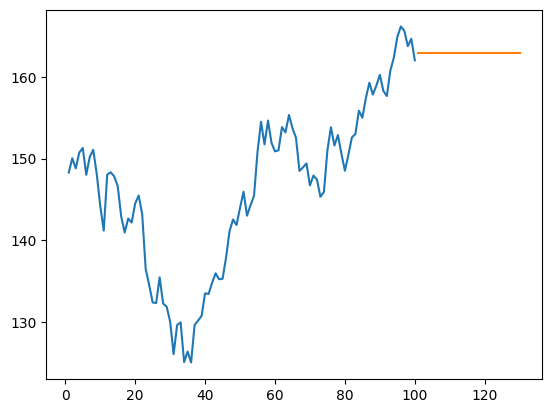

In [111]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(First_output))

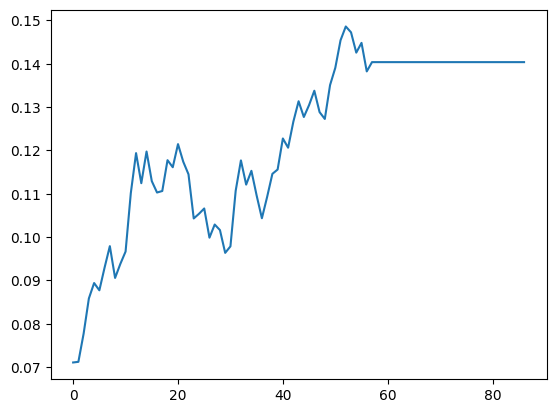

In [112]:
df3 = df1.tolist()
df3.extend(First_output)
plt.plot(df3[1200:])